<a href="https://colab.research.google.com/github/Sentiment-Analysis-Research-Project/RNN-Implementation/blob/main/Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[**REFERENCE**](https://medium.com/aubergine-solutions/scratching-surface-of-rnn-gru-and-lstm-with-example-of-sentiment-analysis-8dd4e748d426)

## Mounting the drive to easily load the datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## perform all the necessary imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load the Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Dataset IMDB/IMDB Dataset.csv")

#train-test split of 70-30
train_set = 45000
max_len_text = 2000

df['sentiment'] = df['sentiment'].replace('positive', 1)
df['sentiment'] = df['sentiment'].replace('negative', 0)

## Tokenize all the reviews

In [5]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
vector = tokenizer.texts_to_sequences(df['review'])

In [6]:
type(vector[0])

list

## Seperate the train and test data

In [7]:
train_data = np.array(vector,dtype=list)[:train_set]
train_label = (np.array(df['sentiment'])[:train_set])
test_data = np.array(vector,dtype=list)[train_set:]
test_label = (np.array(df['sentiment'])[train_set:])

### Pad data to make it uniform

In [8]:
padded_train = pad_sequences(train_data, maxlen=max_len_text)
padded_test = pad_sequences(test_data, maxlen=max_len_text)

## Creating the RNN model

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(13000, 16, input_length=max_len_text))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.2)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 16)          208000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 249,601
Trainable params: 249,601
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the RNN model

In [11]:
EPOCHS = 10
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = model.fit(padded_train, train_label, epochs=EPOCHS, validation_data=(padded_test, test_label),callbacks=[model_checkpoint_callback])

Epoch 1/10
1407/1407 [==============================] - 180s 122ms/step - loss: 0.3968 - accuracy: 0.8231 - val_loss: 0.3073 - val_accuracy: 0.8768
Epoch 2/10
1407/1407 [==============================] - 172s 122ms/step - loss: 0.2520 - accuracy: 0.9015 - val_loss: 0.2783 - val_accuracy: 0.8892
Epoch 3/10
1407/1407 [==============================] - 172s 122ms/step - loss: 0.2175 - accuracy: 0.9162 - val_loss: 0.2710 - val_accuracy: 0.8898
Epoch 4/10
1407/1407 [==============================] - 172s 123ms/step - loss: 0.1947 - accuracy: 0.9262 - val_loss: 0.2902 - val_accuracy: 0.8940
Epoch 5/10
1407/1407 [==============================] - 174s 123ms/step - loss: 0.1655 - accuracy: 0.9381 - val_loss: 0.3079 - val_accuracy: 0.8776
Epoch 6/10
1407/1407 [==============================] - 173s 123ms/step - loss: 0.1524 - accuracy: 0.9433 - val_loss: 0.3476 - val_accuracy: 0.8896
Epoch 7/10
1407/1407 [==============================] - 173s 123ms/step - loss: 0.1319 - accuracy: 0.9521 - val_

In [12]:
def plotLearningCurve(history,epochs):
    import matplotlib.pyplot as plt

    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history['accuracy'])
    plt.plot(epoch_range,history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Val'])
    plt.show()

    plt.plot(epoch_range,history['loss'])
    plt.plot(epoch_range,history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train','Val'])
    plt.show()

## Plotting the Accuracy and Loss of our model

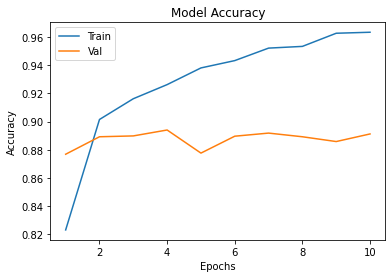

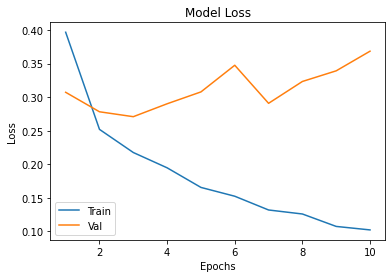

In [13]:
plotLearningCurve(history.history,len(history.epoch))